In [2]:
#pasang library
!pip install yfinance

In [6]:
#import data
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Ambil data historis saham Apple dari tahun lalu hingga sekarang
ticker = "AAPL"
stock_data = yf.download(ticker, start="2024-01-01", end="2025-03-14")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [10]:
# Tampilkan 5 baris pertama
print(stock_data.head())

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-01-02  184.532074  187.315366  182.792518  186.033057  82488700
2024-01-03  183.150375  184.770652  182.335262  183.120556  58414500
2024-01-04  180.824356  181.997307  179.800504  181.062914  71983600
2024-01-05  180.098694  181.669266  179.094727  180.903872  62303300
2024-01-08  184.452560  184.492330  180.416793  181.003268  59144500


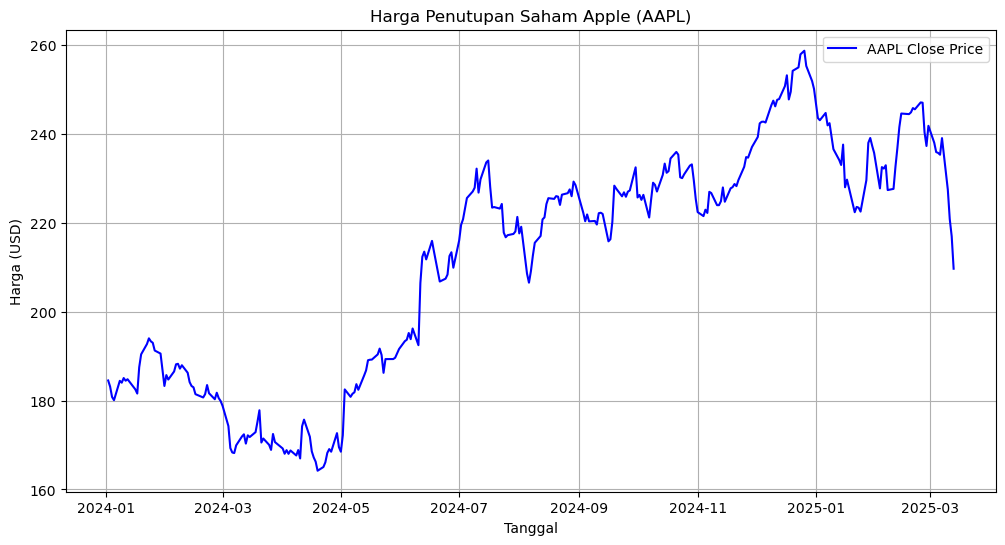

In [12]:
#visualiasi harga saham
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='AAPL Close Price', color='blue')
plt.title("Harga Penutupan Saham Apple (AAPL)")
plt.xlabel("Tanggal")
plt.ylabel("Harga (USD)")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Hitung Moving Average 20 dan 50 hari
stock_data['MA20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()

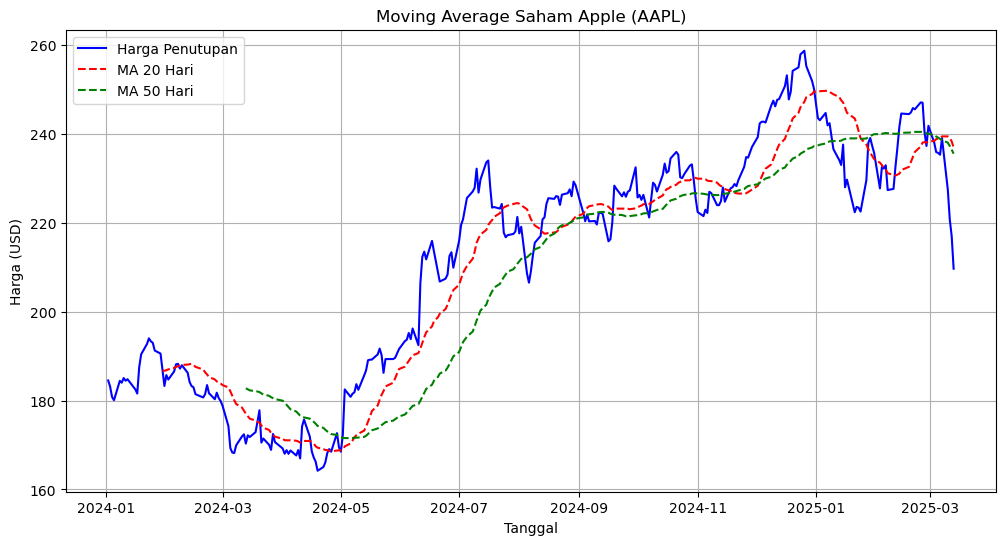

In [16]:
# Visualisasi hasil MA
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Harga Penutupan', color='blue')
plt.plot(stock_data['MA20'], label='MA 20 Hari', color='red', linestyle='--')
plt.plot(stock_data['MA50'], label='MA 50 Hari', color='green', linestyle='--')
plt.title("Moving Average Saham Apple (AAPL)")
plt.xlabel("Tanggal")
plt.ylabel("Harga (USD)")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
#return harian saham
stock_data['Daily Return'] = stock_data['Close'].pct_change()

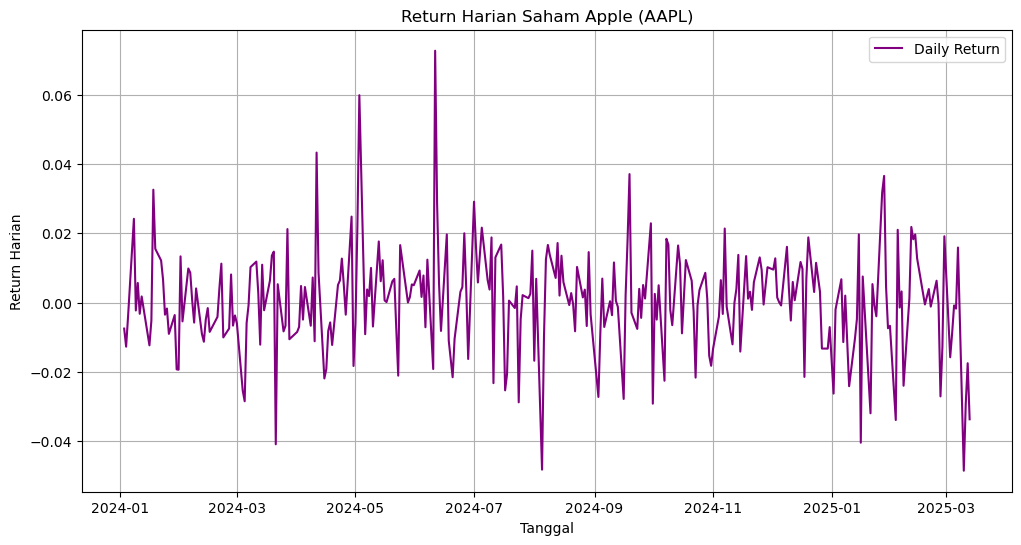

In [20]:
# Visualisasi return harian
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Daily Return'], label='Daily Return', color='purple')
plt.title("Return Harian Saham Apple (AAPL)")
plt.xlabel("Tanggal")
plt.ylabel("Return Harian")
plt.legend()
plt.grid(True)
plt.show()

In [22]:
#masuk analisis resiko
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Ambil data saham Apple selama 1 tahun terakhir
aapl = yf.download('AAPL', period='1y')
aapl.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-03-15,171.808746,171.808746,169.489695,170.365564,121664700
2024-03-18,172.903580,176.874834,172.704523,174.744891,75604200
2024-03-19,175.252472,175.779980,172.216803,173.520644,55215200
2024-03-20,177.830307,177.830307,174.267130,174.894174,53423100
2024-03-21,170.564621,176.655870,170.037113,176.217935,106181300


In [26]:
# Hitung return harian
aapl['Daily Return'] = aapl['Close'].pct_change()

In [28]:
# Drop nilai NaN dari perhitungan pct_change()
daily_return = aapl['Daily Return'].dropna()

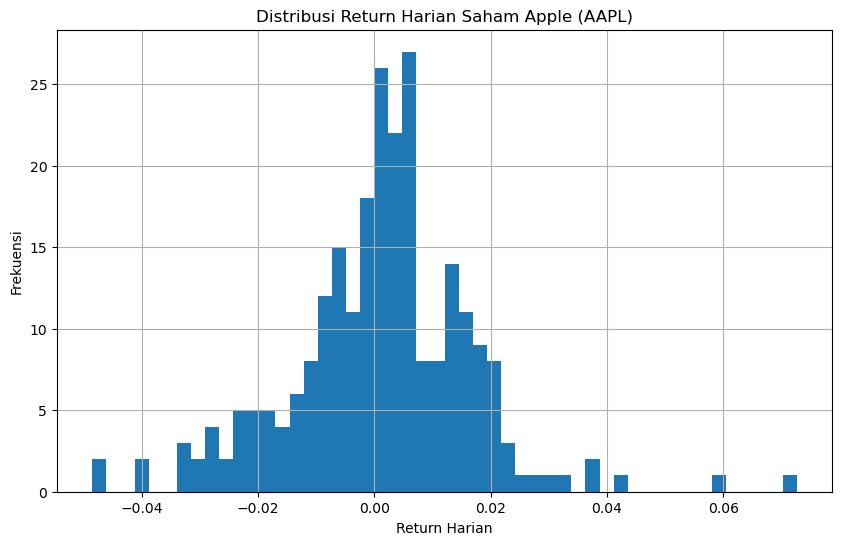

In [30]:
# Visualisasi distribusi return harian
plt.figure(figsize=(10,6))
daily_return.hist(bins=50)
plt.xlabel('Return Harian')
plt.ylabel('Frekuensi')
plt.title('Distribusi Return Harian Saham Apple (AAPL)')
plt.grid(True)
plt.show()

In [32]:
# Statistik dasar dari return harian
print(f"Rata-rata Return Harian: {daily_return.mean():.4f}")
print(f"Volatilitas (Std Dev): {daily_return.std():.4f}")

Rata-rata Return Harian: 0.0010
Volatilitas (Std Dev): 0.0157


In [34]:
#hitung resiko VAR
# VaR dengan tingkat kepercayaan 95% dan 99%
VaR_95 = np.percentile(daily_return, 5)
VaR_99 = np.percentile(daily_return, 1)

In [36]:
#hasilnya
print(f"Value at Risk 95%: {VaR_95:.4%}")
print(f"VaR_99%: {VaR_99:.4f}")

Value at Risk 95%: -2.6718%
VaR_99%: -0.0406


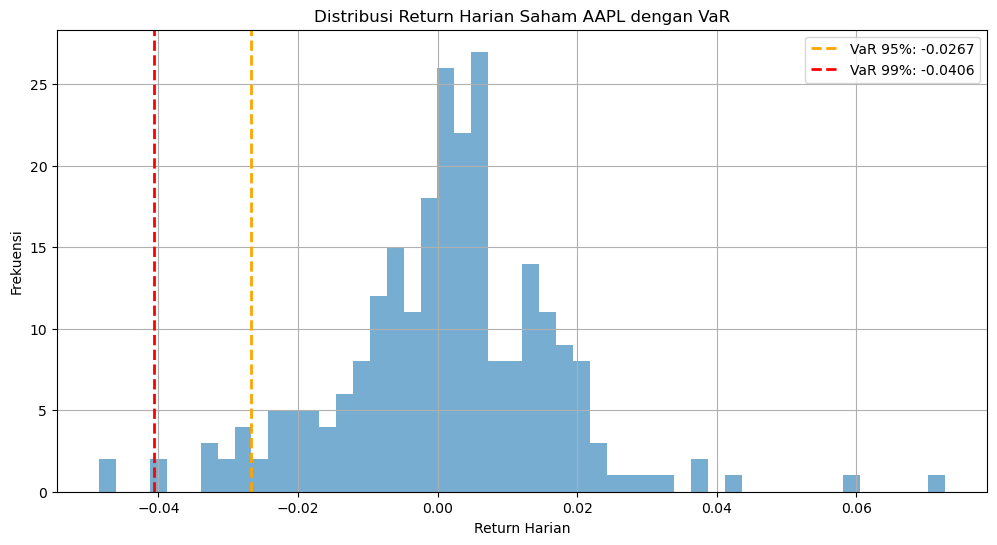

In [38]:
# Visualisasi distribusi return dan VaR
plt.figure(figsize=(12, 6))
daily_return.hist(bins=50, alpha=0.6)
plt.axvline(VaR_95, color='orange', linestyle='dashed', linewidth=2, label=f'VaR 95%: {VaR_95:.4f}')
plt.axvline(VaR_99, color='red', linestyle='dashed', linewidth=2, label=f'VaR 99%: {VaR_99:.4f}')
plt.title("Distribusi Return Harian Saham AAPL dengan VaR")
plt.xlabel('Return Harian')
plt.ylabel('Frekuensi')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
# Nilai VaR
print(f"VaR (95%): {VaR_95:.4f}")
print(f"VaR (99%): {VaR_99:.4f}")

VaR (95%): -0.0267
VaR (99%): -0.0406


In [42]:
#forecasting ARIMA
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [44]:
# Data saham Apple
data = yf.download('AAPL', period='1y')
close_price = data['Close']

[*********************100%***********************]  1 of 1 completed


<Figure size 1200x600 with 0 Axes>

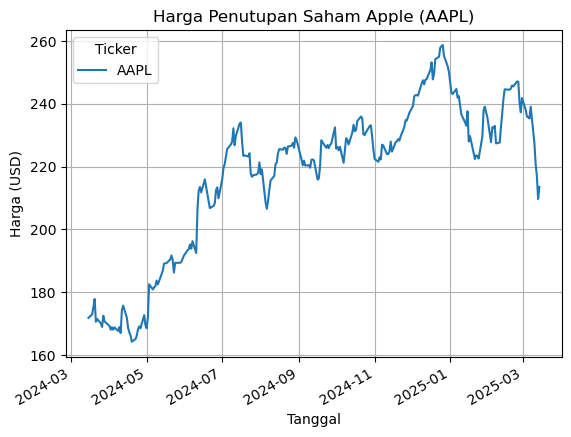

In [46]:
# Plot data harga penutupan
plt.figure(figsize=(12, 6))
close_price.plot(title='Harga Penutupan Saham Apple (AAPL)')
plt.xlabel('Tanggal')
plt.ylabel('Harga (USD)')
plt.grid(True)
plt.show()

In [48]:
#uji parameter
# Cek stasioneritas dengan ADF test
from statsmodels.tsa.stattools import adfuller
result = adfuller(close_price)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.8699371376761738
p-value: 0.34633305952275784


In [50]:
# karena tidak stasioner, diferencing agar stasioner
close_diff = close_price.diff().dropna()

In [52]:
# Cek ulang stasioneritas #aman sudah
result_diff = adfuller(close_diff)
print('ADF Statistic (diff):', result_diff[0])
print('p-value (diff):', result_diff[1])

ADF Statistic (diff): -14.819907148501303
p-value (diff): 1.9709328073024937e-27


In [54]:
# Identifikasi nilai p,d,q optimal dengan Auto ARIMA (optional, install dulu kalau belum ada)
import pmdarima as pm

auto_arima_model = pm.auto_arima(close_price, seasonal=False, trace=True)
print(auto_arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1314.110, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1315.377, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1315.402, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1312.727, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1317.365, Time=0.30 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.351 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  250
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -655.364
Date:                Sun, 16 Mar 2025   AIC                           1312.727
Time:                        09:03:19   BIC                           1316.245
Sample:                             0   HQIC                          1314.143
               

In [58]:
# Asumsi dari auto arima didapat (p,d,q)=(0,1,0), kita fit ARIMA:
model = ARIMA(close_price, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  250
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -655.364
Date:                Sun, 16 Mar 2025   AIC                           1312.727
Time:                        09:09:12   BIC                           1316.245
Sample:                             0   HQIC                          1314.143
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        11.3145      0.739     15.318      0.000       9.867      12.762
Ljung-Box (L1) (Q):                   0.74   Jarque-Bera (JB):                36.41
Prob(Q):                              0.39   Pr

In [112]:
# Prediksi 30 hari kedepan
forecast = model_fit.forecast(steps=30)

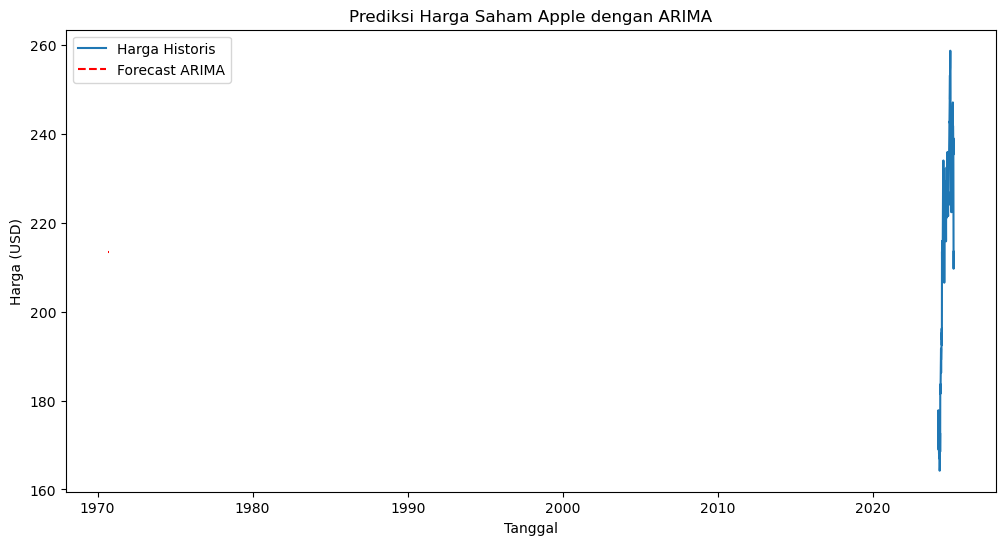

In [114]:
# Plot hasil prediksi
plt.figure(figsize=(12,6))
plt.plot(close_price, label='Harga Historis')
plt.plot(forecast, label='Forecast ARIMA', linestyle='--', color='red')
plt.title('Prediksi Harga Saham Apple dengan ARIMA')
plt.xlabel('Tanggal')
plt.ylabel('Harga (USD)')
plt.legend()

In [104]:
# Prediksi 30 hari ke depan menggunakan ARIMA
forecast = model_fit.forecast(steps=30)

In [106]:
# Buat indeks tanggal baru untuk hasil forecast
last_date = close_price.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

In [108]:
# Ubah forecast menjadi Series dengan indeks tanggal
forecast_series = pd.Series(forecast, index=forecast_dates)

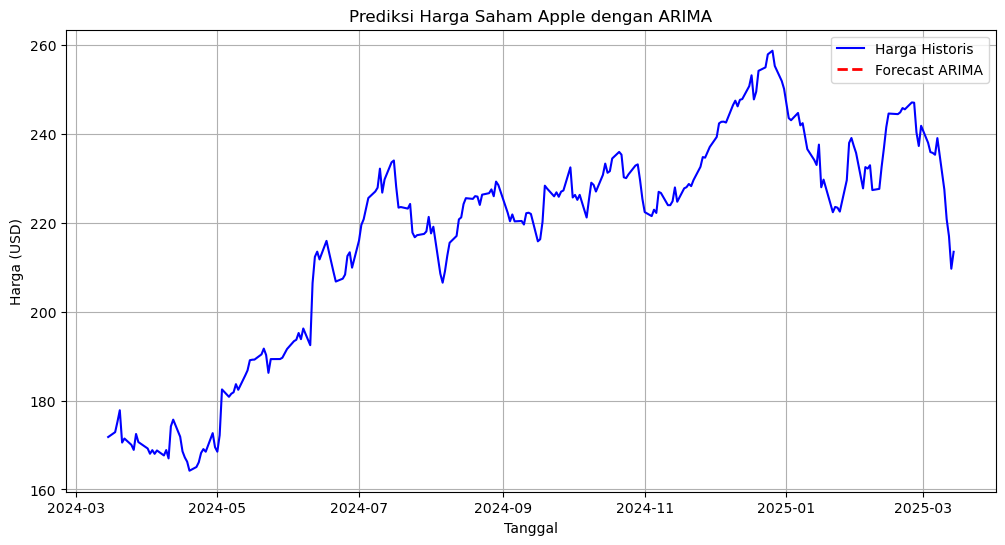

In [110]:
# Plot hasil prediksi dengan jelas
plt.figure(figsize=(12,6))
plt.plot(close_price, label='Harga Historis', color='blue')
plt.plot(forecast_series, label='Forecast ARIMA', linestyle='--', color='red', linewidth=2)
plt.title('Prediksi Harga Saham Apple dengan ARIMA')
plt.xlabel('Tanggal')
plt.ylabel('Harga (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [78]:
#perbaikan
import matplotlib.pyplot as plt
import pandas as pd

In [80]:
# Prediksi 30 hari ke depan menggunakan ARIMA
forecast = model_fit.forecast(steps=30)

In [82]:
# Buat indeks tanggal baru untuk hasil forecast
last_date = close_price.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

In [84]:
# Konversi forecast ke Series dengan indeks tanggal baru
forecast_series = pd.Series(forecast, index=forecast_dates)

In [86]:
# Gabungkan harga historis dan prediksi dalam satu dataframe agar terlihat sambungannya
combined = pd.concat([close_price, forecast_series])

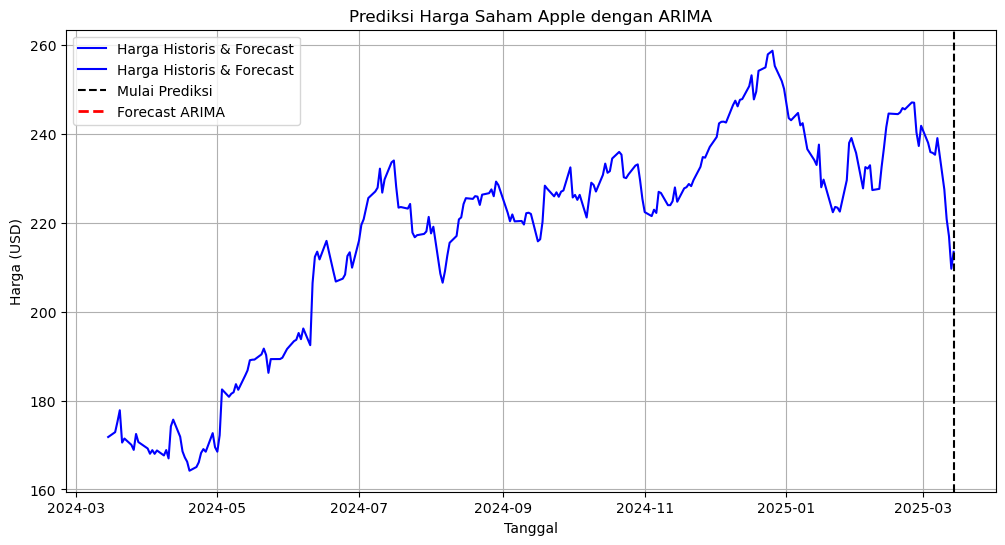

In [100]:
# Plot hasil prediksi perbaikan
plt.figure(figsize=(12,6))
plt.plot(combined, label='Harga Historis & Forecast', color='blue')
plt.axvline(x=last_date, color='black', linestyle='--', label="Mulai Prediksi") # Garis pemisah prediksi
plt.plot(forecast_series, label='Forecast ARIMA', linestyle='--', color='red', linewidth=2)
plt.title('Prediksi Harga Saham Apple dengan ARIMA')
plt.xlabel('Tanggal')
plt.ylabel('Harga (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [102]:
# Cek nilai prediksi
print(forecast_series.head(10))

2025-03-15   NaN
2025-03-16   NaN
2025-03-17   NaN
2025-03-18   NaN
2025-03-19   NaN
2025-03-20   NaN
2025-03-21   NaN
2025-03-22   NaN
2025-03-23   NaN
2025-03-24   NaN
Freq: D, Name: predicted_mean, dtype: float64


In [116]:
#coba-coba perbaikan
from statsmodels.tsa.arima.model import ARIMA

# Gunakan model ARIMA(0,1,0) sesuai hasil Auto ARIMA
model = ARIMA(close_price, order=(0,1,0))
model_fit = model.fit()

# Prediksi 30 hari ke depan
forecast = model_fit.forecast(steps=30)

# Cek apakah hasil prediksi valid
print("Hasil Prediksi ARIMA (30 hari ke depan):")
print(forecast)

Hasil Prediksi ARIMA (30 hari ke depan):
250    213.490005
251    213.490005
252    213.490005
253    213.490005
254    213.490005
255    213.490005
256    213.490005
257    213.490005
258    213.490005
259    213.490005
260    213.490005
261    213.490005
262    213.490005
263    213.490005
264    213.490005
265    213.490005
266    213.490005
267    213.490005
268    213.490005
269    213.490005
270    213.490005
271    213.490005
272    213.490005
273    213.490005
274    213.490005
275    213.490005
276    213.490005
277    213.490005
278    213.490005
279    213.490005
Name: predicted_mean, dtype: float64


In [118]:
import matplotlib.pyplot as plt
import pandas as pd

# Buat indeks tanggal baru untuk hasil forecast
last_date = close_price.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

In [120]:
# Konversi forecast ke Series dengan indeks tanggal baru
forecast_series = pd.Series(forecast.values, index=forecast_dates)

In [122]:
# Gabungkan harga historis dan prediksi dalam satu dataframe
combined = pd.concat([close_price, forecast_series])

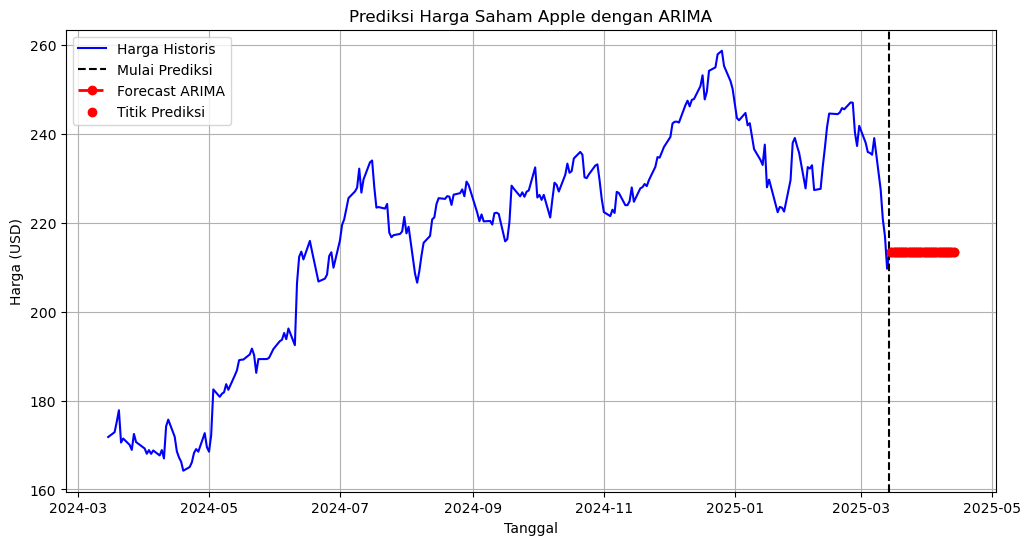

In [130]:
# Plot hasil prediksi
plt.figure(figsize=(12,6))
plt.plot(close_price, label='Harga Historis', color='blue')
plt.axvline(x=last_date, color='black', linestyle='--', label="Mulai Prediksi") # Garis batas prediksi
plt.plot(forecast_series, label='Forecast ARIMA', linestyle='--', color='red', marker='o', linewidth=2)
plt.scatter(forecast_series.index, forecast_series, color='red', marker='o', label="Titik Prediksi")
plt.title('Prediksi Harga Saham Apple dengan ARIMA')
plt.xlabel('Tanggal')
plt.ylabel('Harga (USD)')
plt.legend()
plt.grid(True)
plt.show()

#ternyara model ARIMA yg dihasilkan bukan mdoel yg baik, solusinya pakai 1,1,1 ato LSDM

In [134]:
##LSDM
!pip install keras

In [ ]:
#impor pustaka
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import yfinance as yf

In [ ]:
# Ambil data saham AAPL (Apple) selama 2 tahun terakhir
data = yf.download('AAPL', period='2y')

# Ambil hanya harga penutupan
close_price = data[['Close']]

In [ ]:
#normasliasi data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_price)

In [ ]:
#mulai buat data
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

In [ ]:
# Buat dataset train dan test (80% train, 20% test)
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [194]:
# Buat X_train, y_train, X_test, y_test
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [196]:
# Reshape ke format LSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [198]:
#model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [200]:
#meltih model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 136ms/step - loss: 0.0975 - val_loss: 0.0130
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0092 - val_loss: 0.0269
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0066 - val_loss: 0.0085
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0049 - val_loss: 0.0091
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0036 - val_loss: 0.0095
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0034 - val_loss: 0.0139
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0037 - val_loss: 0.0100
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0030 - val_loss: 0.0102
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0034 - val_loss: 0.0122
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0031 - val_loss: 0.0106
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0028 - val_loss: 0.0083
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.

In [201]:
#prediksi harga saham
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Konversi kembali ke skala asli
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1,1))
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


ValueError: x and y must have same first dimension, but have shapes (161,) and (41, 1)

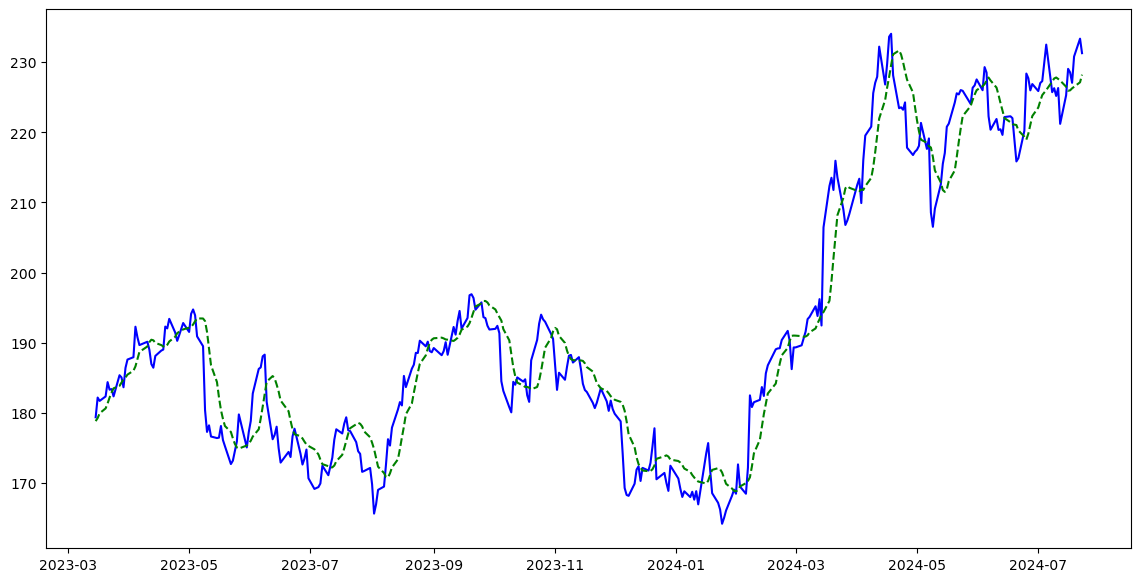

In [245]:
#visualiasi model
plt.figure(figsize=(14,7))
plt.plot(close_price.index[:len(y_train)], y_train, label='Harga Asli (Train)', color='blue')
plt.plot(close_price.index[:len(y_train)], train_predict, label='Prediksi Train', linestyle='--', color='green')

plt.plot(close_price.index[len(y_train):], y_test, label='Harga Asli (Test)', color='black')
plt.plot(close_price.index[len(y_train):], test_predict, label='Prediksi Test', linestyle='--', color='red')

plt.xlabel('Tanggal')
plt.ylabel('Harga Saham')
plt.title('Prediksi Harga Saham Apple dengan LSTM')
plt.legend()
plt.grid(True)

# Simpan gambar ke file PNG dengan resolusi tinggi
plt.savefig("1_lstm.png", dpi=300, bbox_inches='tight')

plt.show()

ValueError: x and y must have same first dimension, but have shapes (161,) and (41, 1)

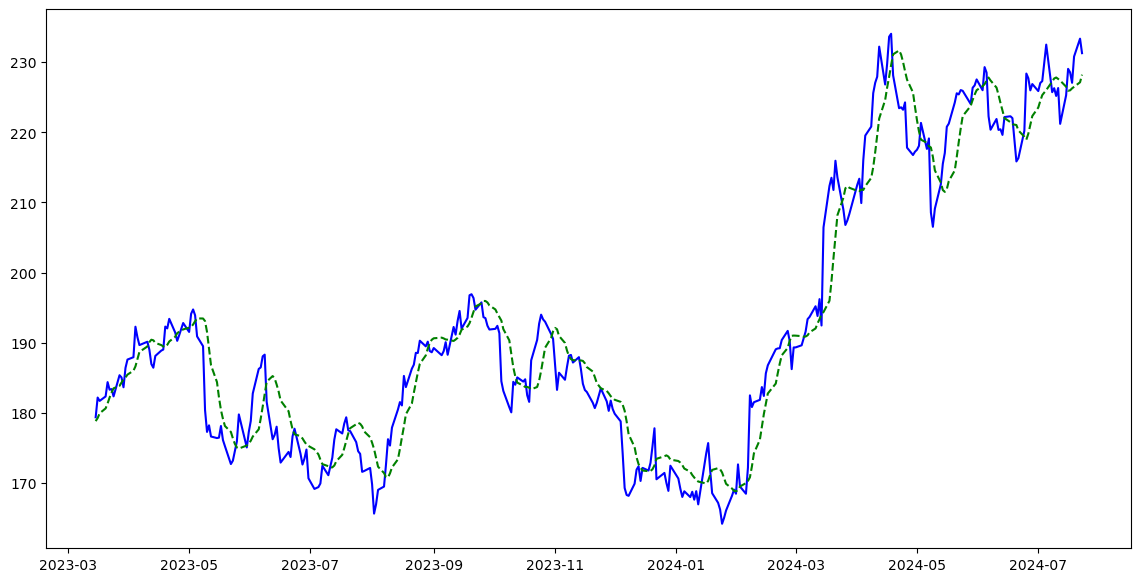

In [228]:
# Buat ulang plot
plt.figure(figsize=(14,7))
plt.plot(close_price.index[:len(y_train)], y_train, label='Harga Asli (Train)', color='blue')
plt.plot(close_price.index[:len(y_train)], train_predict, label='Prediksi Train', linestyle='--', color='green')

plt.plot(close_price.index[len(y_train):], y_test, label='Harga Asli (Test)', color='black')
plt.plot(close_price.index[len(y_train):], test_predict, label='Prediksi Test', linestyle='--', color='red')

plt.xlabel('Tanggal')
plt.ylabel('Harga Saham')
plt.title('Prediksi Harga Saham Apple dengan LSTM')
plt.legend()
plt.grid(True)

# Simpan gambar ke file PNG dengan resolusi tinggi
plt.savefig("prediksi_lstm.png", dpi=300, bbox_inches='tight')

# Tutup plot sebelum menampilkan
plt.close()

print("Grafik berhasil disimpan sebagai 'prediksi_lstm.png'. Cek file tersebut!")

In [232]:
from IPython.display import FileLink

# Simpan file
plt.savefig("prediksi_lstm.png", dpi=300, bbox_inches='tight')

# Tampilkan link download
FileLink("prediksi_lstm.png")

C:\Users\ACER\prediksi_lstm.png

<Figure size 640x480 with 0 Axes>

In [239]:
import shutil

# Simpan file
plt.savefig("prediksi_lstm.png", dpi=300, bbox_inches='tight')

# Pindahkan ke folder default Downloads di Windows
shutil.move("prediksi_lstm.png", "C:/Users/ACER/Downloads/prediksi_lstm.png")

print("File berhasil disimpan di folder Downloads!")


File berhasil disimpan di folder Downloads!


<Figure size 640x480 with 0 Axes>

In [247]:
import shutil

# Simpan file
plt.savefig("1_lstm.png", dpi=300, bbox_inches='tight')

# Pindahkan ke folder default Downloads di Windows
shutil.move("1_lstm.png", "C:/Users/ACER/Downloads/prediksi_lstm.png")

print("File berhasil disimpan di folder Downloads!")

File berhasil disimpan di folder Downloads!


<Figure size 640x480 with 0 Axes>

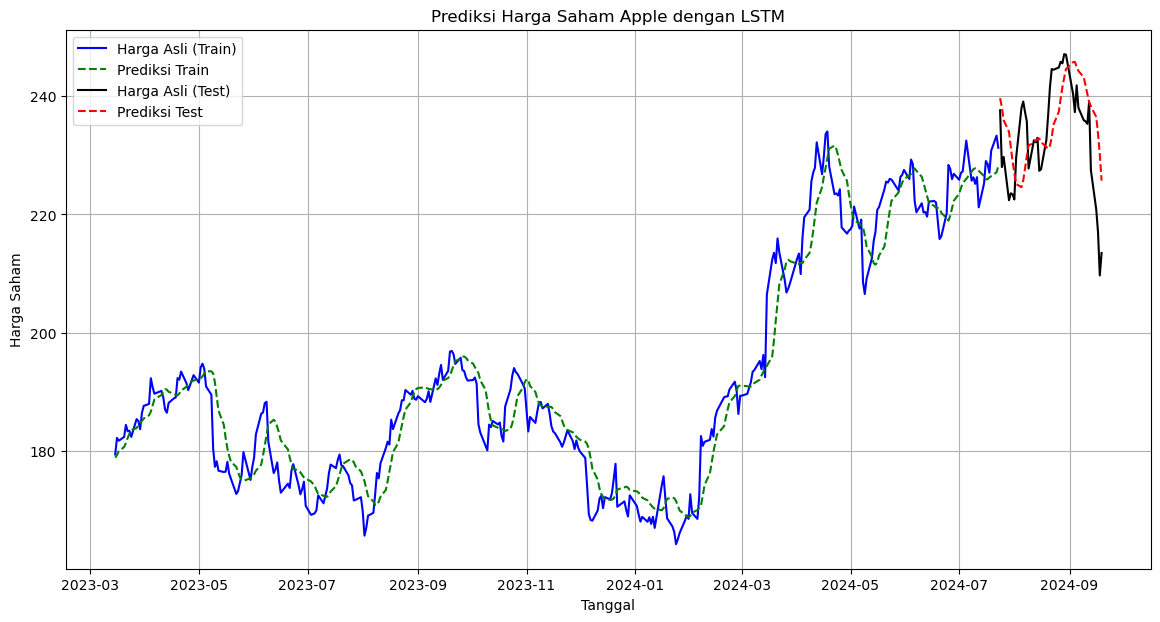

In [256]:
plt.figure(figsize=(14,7))

# Plot data train dengan validasi panjang array
plt.plot(close_price.index[:len(train_predict)], y_train[:len(train_predict)], label='Harga Asli (Train)', color='blue')
plt.plot(close_price.index[:len(train_predict)], train_predict, label='Prediksi Train', linestyle='--', color='green')

# Plot data test dengan validasi panjang array
plt.plot(close_price.index[len(train_predict):len(train_predict)+len(test_predict)], y_test[:len(test_predict)], label='Harga Asli (Test)', color='black')
plt.plot(close_price.index[len(train_predict):len(train_predict)+len(test_predict)], test_predict, label='Prediksi Test', linestyle='--', color='red')

plt.xlabel('Tanggal')
plt.ylabel('Harga Saham')
plt.title('Prediksi Harga Saham Apple dengan LSTM')
plt.legend()
plt.grid(True)

# Simpan gambar
plt.savefig("prediksi_lstm.png", dpi=300, bbox_inches='tight')

plt.show()

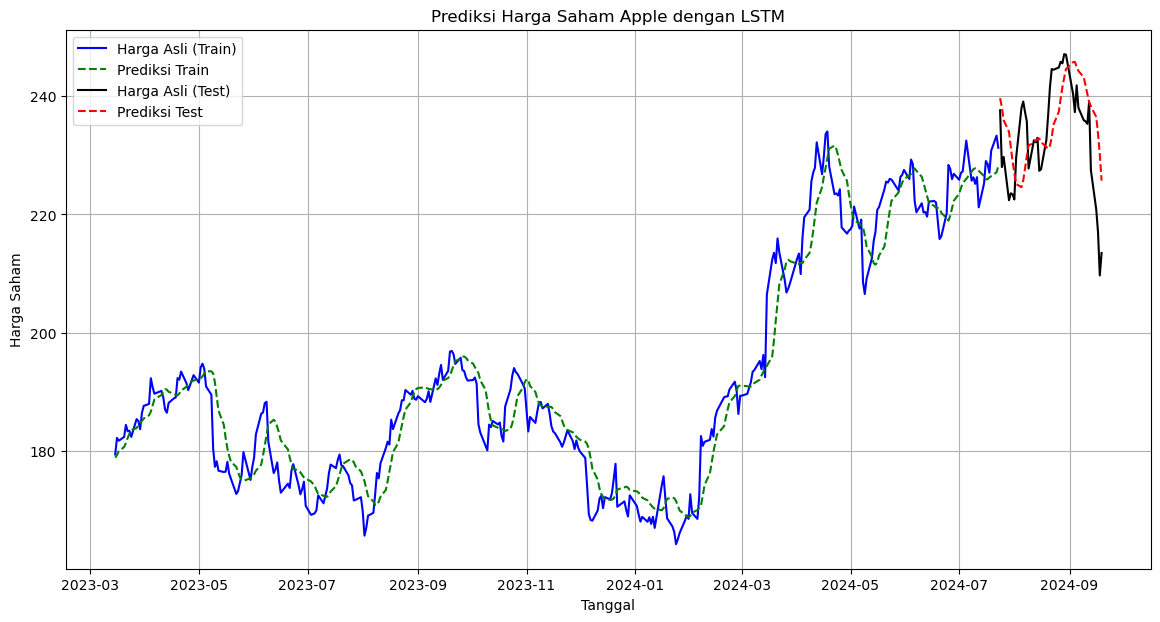

C:\Users\ACER\prediksi_lstm.png

In [258]:
from IPython.display import FileLink

plt.figure(figsize=(14,7))

# Plot data train dengan validasi panjang array
plt.plot(close_price.index[:len(train_predict)], y_train[:len(train_predict)], label='Harga Asli (Train)', color='blue')
plt.plot(close_price.index[:len(train_predict)], train_predict, label='Prediksi Train', linestyle='--', color='green')

# Plot data test dengan validasi panjang array
plt.plot(close_price.index[len(train_predict):len(train_predict)+len(test_predict)], 
         y_test[:len(test_predict)], label='Harga Asli (Test)', color='black')
plt.plot(close_price.index[len(train_predict):len(train_predict)+len(test_predict)], 
         test_predict, label='Prediksi Test', linestyle='--', color='red')

plt.xlabel('Tanggal')
plt.ylabel('Harga Saham')
plt.title('Prediksi Harga Saham Apple dengan LSTM')
plt.legend()
plt.grid(True)

# Simpan gambar
filename = "prediksi_lstm.png"
plt.savefig(filename, dpi=300, bbox_inches='tight')

plt.show()

# Tampilkan link download langsung setelah plot
FileLink(filename)

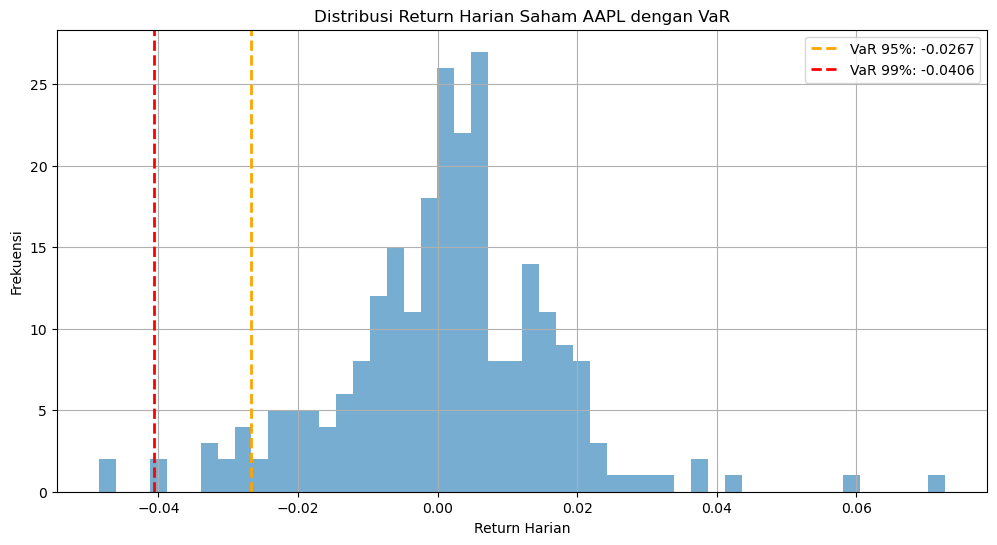

C:\Users\ACER\VaR_Distribusi_Return.png

In [261]:
from IPython.display import FileLink

# Simpan nama file
filename = "VaR_Distribusi_Return.png"

# Visualisasi distribusi return dan VaR
plt.figure(figsize=(12, 6))
daily_return.hist(bins=50, alpha=0.6)
plt.axvline(VaR_95, color='orange', linestyle='dashed', linewidth=2, label=f'VaR 95%: {VaR_95:.4f}')
plt.axvline(VaR_99, color='red', linestyle='dashed', linewidth=2, label=f'VaR 99%: {VaR_99:.4f}')
plt.title("Distribusi Return Harian Saham AAPL dengan VaR")
plt.xlabel('Return Harian')
plt.ylabel('Frekuensi')
plt.legend()
plt.grid(True)

# Simpan gambar sebelum menampilkan
plt.savefig(filename, dpi=300, bbox_inches='tight')

plt.show()

# Tampilkan link download otomatis setelah plot
FileLink(filename)

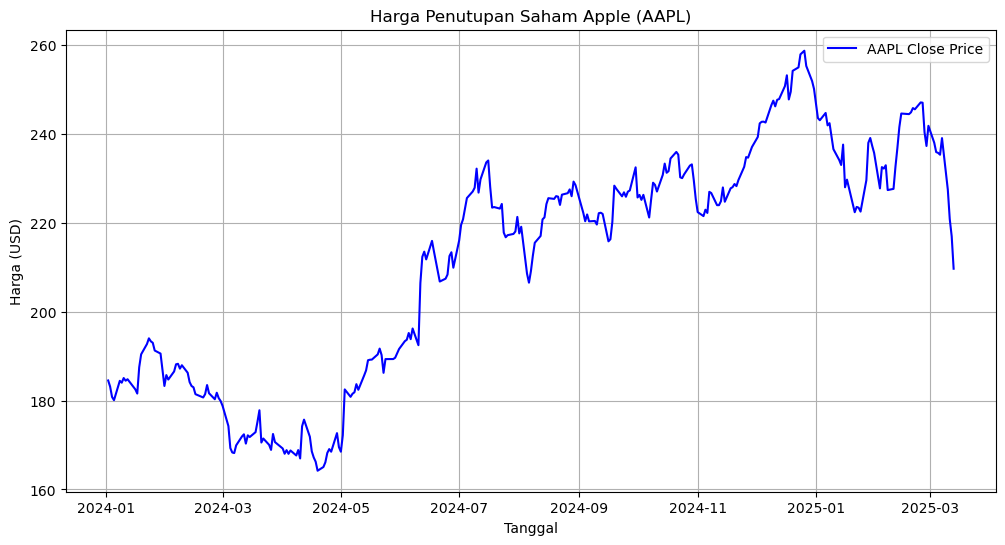

C:\Users\ACER\Harga_Penutupan_AAPL.png

In [264]:
from IPython.display import FileLink

# Simpan nama file
filename = "Harga_Penutupan_AAPL.png"

# Visualisasi harga saham
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='AAPL Close Price', color='blue')
plt.title("Harga Penutupan Saham Apple (AAPL)")
plt.xlabel("Tanggal")
plt.ylabel("Harga (USD)")
plt.legend()
plt.grid(True)

# Simpan gambar sebelum ditampilkan
plt.savefig(filename, dpi=300, bbox_inches='tight')

plt.show()

# Tampilkan link download otomatis setelah plot
FileLink(filename)

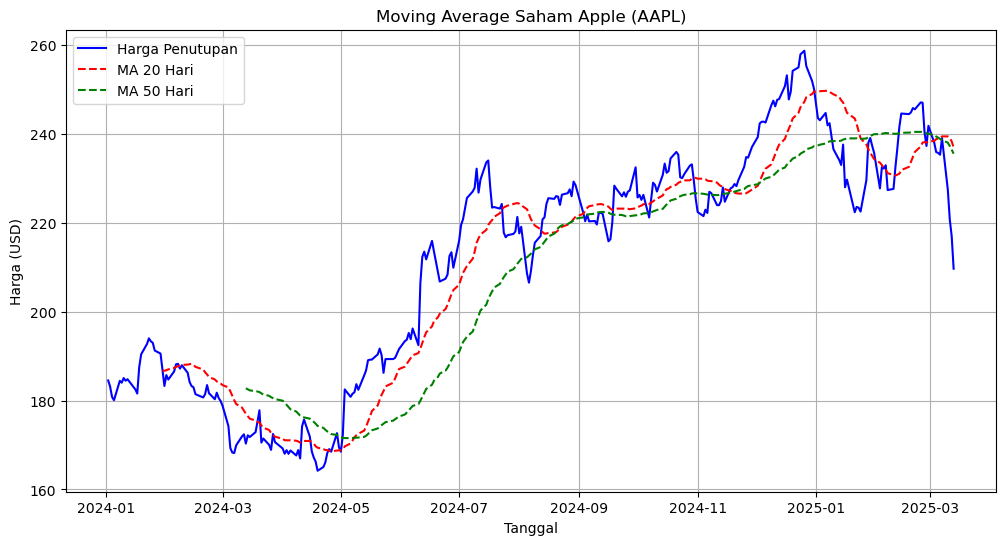

C:\Users\ACER\Moving_Average_AAPL.png

In [266]:
from IPython.display import FileLink

# Simpan nama file
filename = "Moving_Average_AAPL.png"

# Visualisasi hasil MA
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Harga Penutupan', color='blue')
plt.plot(stock_data['MA20'], label='MA 20 Hari', color='red', linestyle='--')
plt.plot(stock_data['MA50'], label='MA 50 Hari', color='green', linestyle='--')
plt.title("Moving Average Saham Apple (AAPL)")
plt.xlabel("Tanggal")
plt.ylabel("Harga (USD)")
plt.legend()
plt.grid(True)

# Simpan gambar sebelum ditampilkan
plt.savefig(filename, dpi=300, bbox_inches='tight')

plt.show()

# Tampilkan link download otomatis setelah plot
FileLink(filename)


In [ ]:
#alhamdulilah selesai sobb